# Exploratory Data Analysis (EDA) and Data Visualization

Rafiq Islam  
2024-11-08

In this Exploratory Data Analysis and Visualization notebook, we want to
explore the
<a href="https://www.kaggle.com/datasets/mchirico/montcoalert"
target="_blank" style="text-decoration:none">911 call data from
Kaggle.com</a>

## The Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('911.csv')

## Discriptive Statistics

We first check the data information to see the number of observations,
datatype, memory usages etc.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105957 entries, 0 to 105956
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        105957 non-null  float64
 1   lng        105957 non-null  float64
 2   desc       105957 non-null  object 
 3   zip        92735 non-null   float64
 4   title      105957 non-null  object 
 5   timeStamp  105957 non-null  object 
 6   twp        105924 non-null  object 
 7   addr       105957 non-null  object 
 8   e          105957 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 7.3+ MB

A first look of the data

In [3]:
df.head()

Some data related questions. For example,

-   What are the top 10 zipcodes for 911 calls?

    ``` python
    df.zip.value_counts().head(10)
    ```

        zip
        19401.0    7445
        19464.0    7122
        19403.0    5189
        19446.0    5060
        19406.0    3404
        19002.0    3238
        19468.0    3202
        19454.0    2984
        19090.0    2832
        19046.0    2779
        Name: count, dtype: int64

-   What are the top 10 twonships for the 911 calls?

    ``` python
    df.twp.value_counts().head(10)
    ```

        twp
        LOWER MERION        9069
        ABINGTON            6403
        NORRISTOWN          6265
        UPPER MERION        5551
        CHELTENHAM          4882
        POTTSTOWN           4448
        UPPER MORELAND      3658
        LOWER PROVIDENCE    3435
        PLYMOUTH            3371
        HORSHAM             3142
        Name: count, dtype: int64

## Feature Engineering

Sometimes creating new features from the existing features helps
understand the data better. For example, for this dataset, we can create
a new column called `Reason` for emergency 911 call.

In [6]:
df['reason'] = df.title.apply(lambda title: title.split(':')[0])
df.head(3)

what are top reasons for the emergency calls?

In [7]:
df.reason.value_counts()

reason
EMS        52515
Traffic    37505
Fire       15937
Name: count, dtype: int64

visualization of the reason column

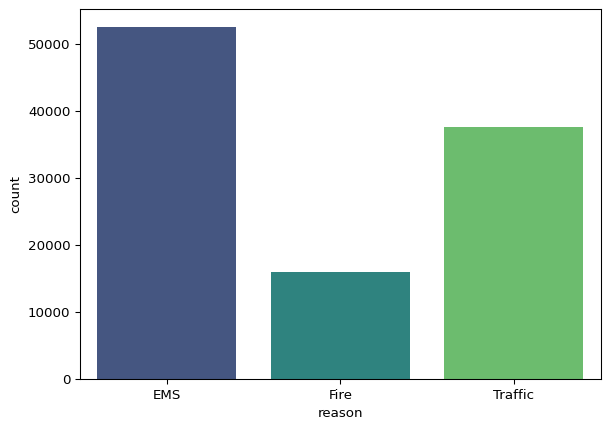

In [8]:
sns.countplot(x=df.reason, hue=df.reason, palette='viridis')

The `timeStamp` column contains time information year-month-day
hour:minute:second format but in string value/object. So we can convert
this column to obtain new features.

In [9]:
df['timeStamp'] = pd.to_datetime(df.timeStamp)
time = df.timeStamp.iloc[0]

/tmp/ipykernel_7619/1994586768.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Let’s create new features called `hour`, `month`, and `day` of the
calls.

In [10]:
df['hour'] = df.timeStamp.apply(lambda time: time.hour)
df['month'] = df.timeStamp.apply(lambda time: time.month)
df['day'] = df.timeStamp.apply(lambda time: time.dayofweek)
days = {
    0:'Monday', 1:'Tuesday', 2:'Wednesday', 
    3:'Thursday', 4:'Friday', 5:'Saturday',
    6:'Sunday'
    }
df.day = df.day.map(days)
df = df[
    ['lat','lng','zip','twp','e','reason',
    'month','day','hour','title','timeStamp',
    'desc','addr']
    ]
df.head(3)

Now that we have almost a clean dataset, we can analyze the reason
column based on the days of the week or months of a year.

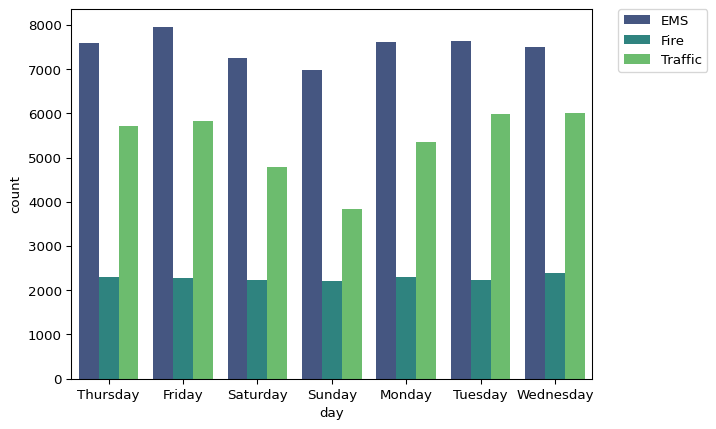

In [11]:
sns.countplot(x='day', data= df, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.0)

For the month column

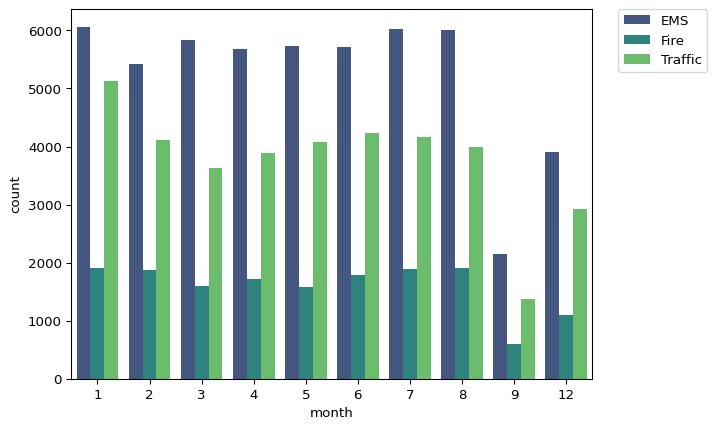

In [12]:
sns.countplot(x='month', data= df, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.0)

To create a time series data

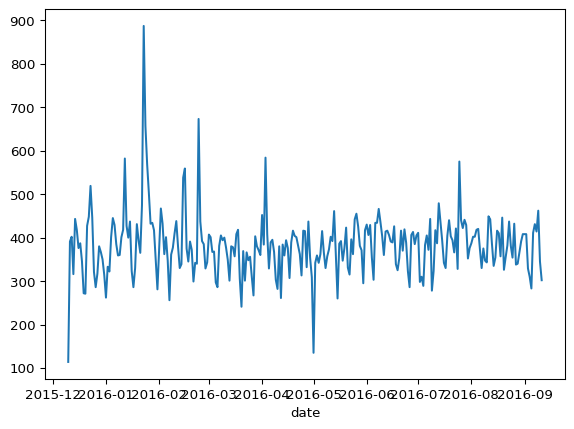

In [13]:
df['date'] = df['timeStamp'].apply(lambda time: time.date())
df.groupby('date').count()['twp'].plot()

Now to see for each reason

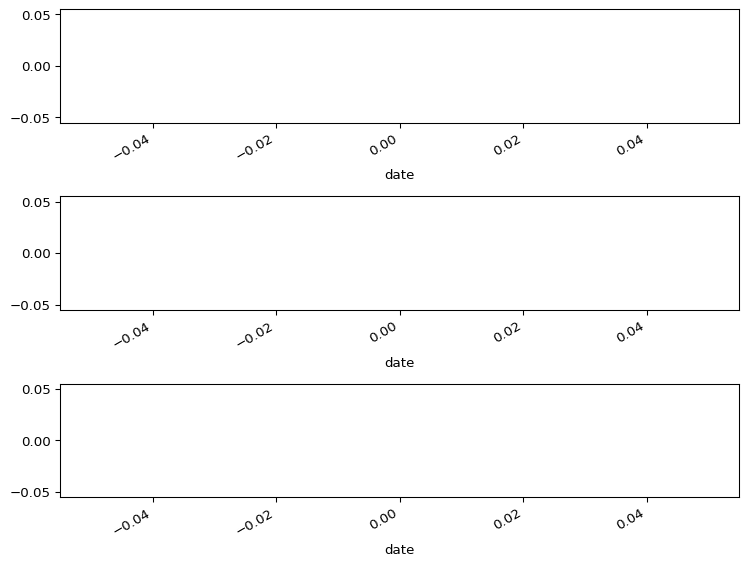

In [14]:
start_date = pd.to_datetime('2019-01-01')


df['date'] = pd.to_datetime(df['date'])


fig = plt.figure(figsize=(7.9,6))

ax1 = fig.add_subplot(311)
df[(df['reason'] == 'Traffic') & (df['date'] >= start_date)].groupby('date').count()['twp'].plot(ax=ax1)

ax2 = fig.add_subplot(312)
df[(df['reason'] == 'Fire') & (df['date'] >= start_date)].groupby('date').count()['twp'].plot(ax=ax2)

ax3 = fig.add_subplot(313)
df[(df['reason'] == 'EMS') & (df['date'] >= start_date)].groupby('date').count()['twp'].plot(ax=ax3)

plt.tight_layout()

plt.show()

------------------------------------------------------------------------

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/eda/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/eda/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/eda/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**